In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Auswertung F43: Ramman-Spektroskopie

We measure the voltage of a Photodiode as at different angles of the .... 
There seem to be inconsistencies regarding the laser, dropping considerably in intensity.

In [8]:
angles = np.array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 12.5, 11.5, 12.25,  12.35, 12.15, 
                   10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 359, 358, 357, 356, 355, 354, 353, 340, 345, 347, 
                   350, 351, 350.5, 350.25, 350.6, 350.35, 351.5, 352, 349, 348, 330,100, 200, 75,50,
                   150, 275, 230, 300, 320]) # degrees
voltage = np.array([10.60, 10.44, 10.44, 10.30, 10.41, 10.27, 10.5, 9.60, 4.42, 2.65, 8.91, 
                    3.32, 7.80, 7.83, 6.46, 1.85, 1.82, 1.80, 1.79, 1.75, 1.75, 1.72, 1.73, 
                    1.67, 1.67, 1.67, 1.64, 1.57, 1.52, 1.48, 1.47, 1.46, 1.43, 8.80, 8.67, 8.46, 8.21, 
                    2.84, 5.63, 7.85, 4.15, 7.09, 1.35, 1.10, 7.98, 7.72, 6.79, 1.5, 7.10, 0.75, 5.20,
                    6.01, 1.92, 3.50, 1.29, 3.95]) # mV
# correct sign
voltage = - voltage

# set up pandas dataframe for storing data/easy sorting
data = pd.DataFrame()
data['angle'] = angles
data['voltage'] = voltage

# sort data by angle
data = data.sort_values(by='angle').reset_index(drop=True)
# wrap values above 180 to to negative, such that 359 equiv to -1
mask = data['angle'] > 180
data.loc[mask, 'angle'] = data.loc[mask, 'angle'] - 360
data


,angle,voltage
0,0.00,-1.67
1,1.00,-1.67
2,2.00,-1.67
3,3.00,-1.73
4,4.00,-1.72
5,5.00,-1.75
6,6.00,-1.75
7,7.00,-1.79
8,8.00,-1.80
9,9.00,-1.82


In [9]:
plt.scatter(data['angle'], data['voltage'])
plt.xlabel('Angle (degrees)')
plt.ylabel('Voltage (mV)')
plt.xlim(-12, -5)

(-12.0, -5.0)

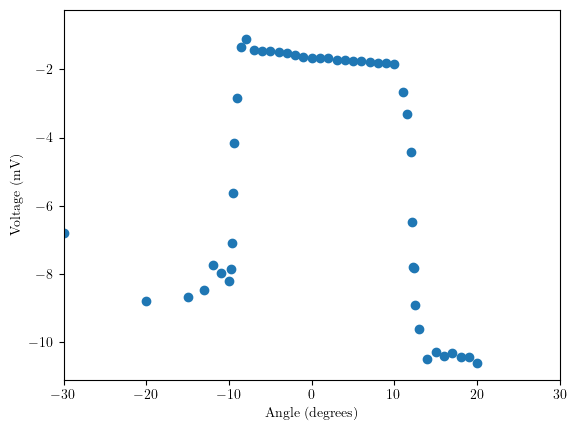

In [25]:
%matplotlib inline
plt.scatter(data['angle'], data['voltage'])
plt.xlabel('Angle (degrees)')
plt.ylabel('Voltage (mV)')
plt.xlim(-30, 30)
plt.show()

In [11]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost

# looking at the first transition
mask1 = (data['angle'] > 9) & (data['angle'] < 15)

# continue with minuit somehow TODO
inx_i = 40
inx_f = 49
deg_fit = data["angle"][inx_i: inx_f]
u_fit = data['voltage'][inx_i: inx_f]
sigma = 0.03*np.ones_like(u_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t1*x +t0

chi_2 = cost.LeastSquares(deg_fit, u_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=0, t1=0.58)
minuit.migrad()
t0_1, t1_1 = minuit.values['t0'], minuit.values['t1']
minuit.minos()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.448e+04 (χ²/ndof = 2068.3)│              Nfcn = 59               │
│ EDM = 6.02e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │   22.72   │   0.12    │   -0.12    │    0.12    │         │         │       │
│ 1 │ t1   │   2.957   │   0.012   │   -0.012   │   0.012    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.12   │   0.12    │  -0.012   │   0.012   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────┐
│    │       t0       t1 │
├────┼───────────────────┤
│ t0 │   0.0133  1.40e-3 │
│ t1 │  1.40e-3 0.000149 │
└────┴───────────────────┘

In [12]:
inx_i1 = 10
inx_f1 = 20
deg_fit = data["angle"][inx_i1: inx_f1]
u_fit = data['voltage'][inx_i1: inx_f1]
sigma = 0.03*np.ones_like(u_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t1*x +t0

chi_2 = cost.LeastSquares(deg_fit, u_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=0, t1=0.58)
minuit.migrad()
t0_2, t1_2 = minuit.values['t0'], minuit.values['t1']
minuit.minos()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.347e+04 (χ²/ndof = 1683.6)│              Nfcn = 63               │
│ EDM = 9.91e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ t0   │   25.36   │   0.11    │   -0.11    │    0.11    │         │         │       │
│ 1 │ t1   │  -2.624   │   0.009   │   -0.009   │   0.009    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          t0           │          t1           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.11   │   0.11    │  -0.009   │   0.009   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────┐
│    │       t0       t1 │
├────┼───────────────────┤
│ t0 │   0.0124 -1.02e-3 │
│ t1 │ -1.02e-3 8.45e-05 │
└────┴───────────────────┘

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
C:\Users\magnu\AppData\Local\Temp\ipykernel_18216\2370953896.py:7: SyntaxWarning: invalid escape sequence '\p'
  label = 'Fit: \n $m$ = ({:.3f} $\pm$ 0.012) [mV/degrees]'.format(t1_1))
C:\Users\magnu\AppData\Local\Temp\ipykernel_18216\2370953896.py:9: SyntaxWarning: invalid escape sequence '\p'
  label = 'Fit: \n $m$ = ({:.3f} $\pm$ 0.009) [mV/degrees]'.format(t1_2))


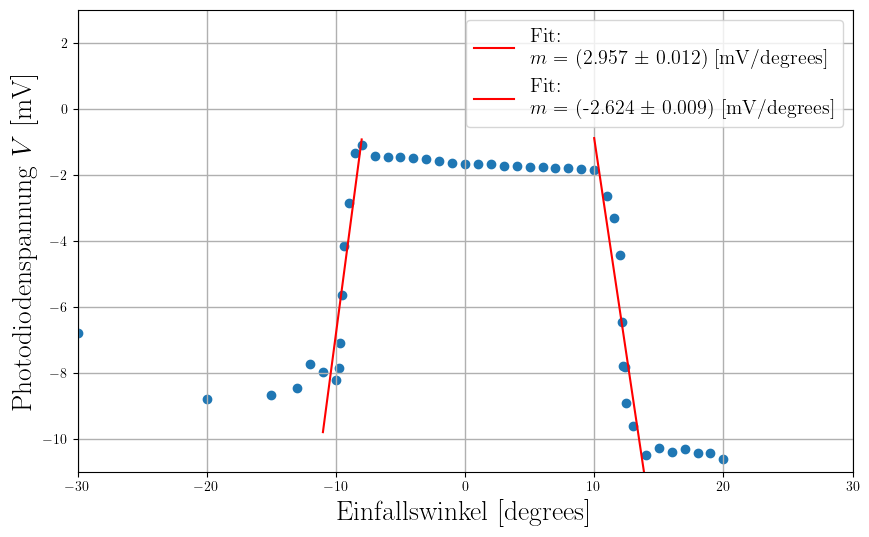

In [133]:
fig,ax = plt.subplots(figsize = (10, 6))
plt.grid(visible = True, which = 'major', linewidth=1.0)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)

plt.scatter(data['angle'], data['voltage'])
plt.plot(data['angle'][inx_i:inx_f],linear(data['angle'][inx_i:inx_f], t0_1, t1_1), color = 'red',
        label = 'Fit: \n $m$ = ({:.3f} $\pm$ 0.012) [mV/degrees]'.format(t1_1))
plt.plot(data['angle'][inx_i1:inx_f1],linear(data['angle'][inx_i1:inx_f1], t0_2, t1_2), color = 'red', 
        label = 'Fit: \n $m$ = ({:.3f} $\pm$ 0.009) [mV/degrees]'.format(t1_2))
plt.xlabel('Einfallswinkel [degrees]', fontsize = 20)
plt.ylabel('Photodiodenspannung $V$ [mV]', fontsize = 20)
plt.legend(fontsize='x-large', loc = 'best')
plt.xlim(-30, 30)
plt.ylim(-11,3)
plt.show()

As a next step we meuarese the voltace characteristic of the Photomultiplier. For this purpouse, we pump vacuum into the gas-cell and vary the applied voltage, i.e. current, and measure the counts for three minuts. We note the mean value of the measured counts and their standart deviation. During the measurements, the preasure of the cell is $p = (30\pm 5)$ mbar. 

In [15]:
u_in = np.array([1299, 1349,1400,1450,1500,1549,1600,1650,1699,1751,1801,1850,1900,1950,2000]) #V
i_in = np.array([.095, 0.099,0.102,.106,.110,.113,0.117,.120,.124,.128,.131,.135,.139,.142,.146,0.136]) #mA
count = np.array([0,0,0,0.10,0.5,2.30,4.0,6.60,24.90,95.90,222.20,380.70,1319.20,1683.6,969])
dcount= np.array([0,0,0,0.32,0.71,2.0,1.94,2.17,4.58,7.87,14.19,22.76,46.38,37.05,22.44]) #
np.sort(u_in)
np.sort(i_in)


array([0.095, 0.099, 0.102, 0.106, 0.11 , 0.113, 0.117, 0.12 , 0.124,
       0.128, 0.131, 0.135, 0.136, 0.139, 0.142, 0.146])

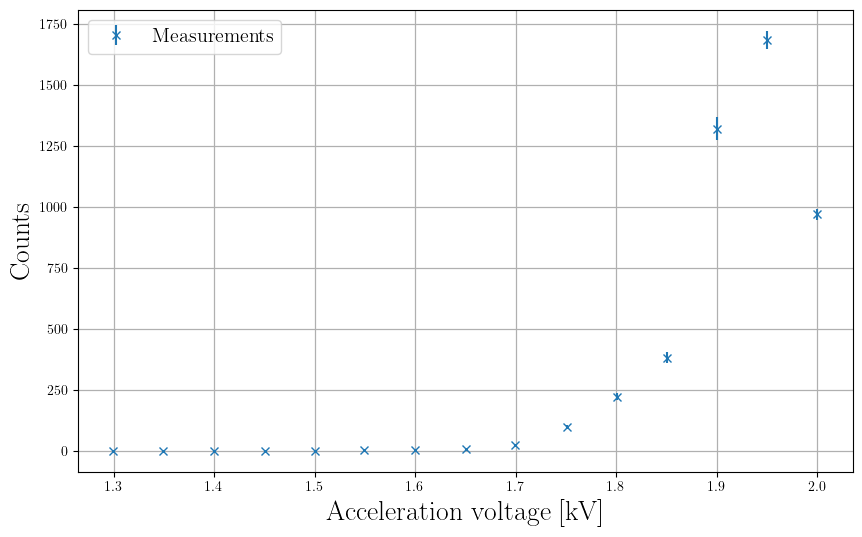

In [16]:
fig,ax = plt.subplots(figsize = (10, 6))
plt.grid(visible = True, which = 'major', linewidth=0.9)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)
plt.errorbar(u_in/1000, count, dcount, label="Measurements", linestyle = 'None', fmt='x')
plt.xlabel('Acceleration voltage [kV]', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.legend(fontsize='x-large', loc = 'best')
plt.show()

From the last three measurement we could notice strong deviations from the expected shape of the voltage characteristics. After a carefule look at the laser, our tutor could determine that the laser had major issues. For this reason the next parts of the experiment will be studied with old measurements. 

We start by plotting the current characteristic. 

In [37]:
U3=np.array([1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000,2050])#V
U3_err=np.ones(len(U3))*0.5#V
Rate=np.array([3.22,2.60,8.30,18.90,145.6,1822.1,9693.6,25885,
    51397.6,78234.1,101675.8,118372.7])
Rate_err=np.array([1.66,1.51,2.31,3.45,14.57,37.54,82.43,193.9,184.92,
  409.37,327.07,473.9])

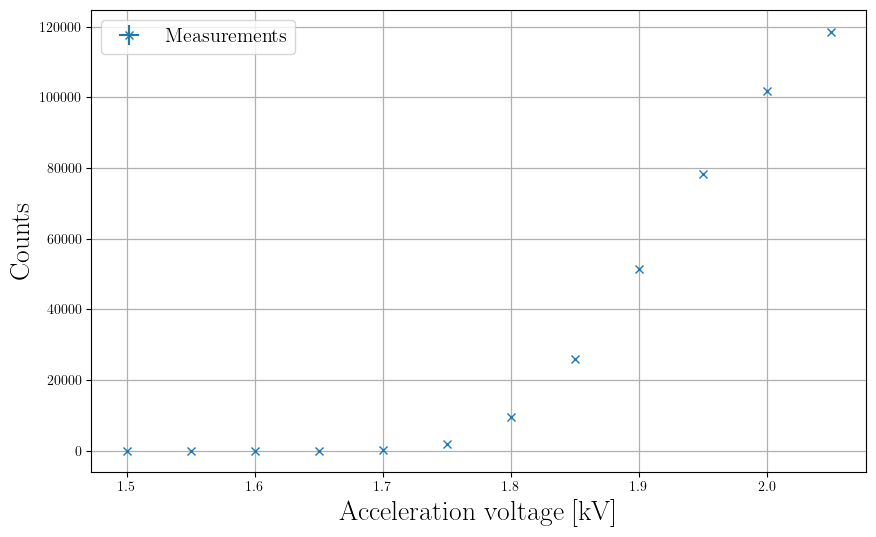

In [47]:
fig,ax = plt.subplots(figsize = (10, 6))
plt.grid(visible = True, which = 'major', linewidth=0.9)
plt.grid(visible = True, which = 'minor',linestyle = '--', linewidth=0.8)
plt.errorbar(U3/1000, Rate, xerr = U3_err/1000, yerr=Rate_err, label="Measurements", linestyle = 'None', fmt='x')
plt.xlabel('Acceleration voltage [kV]', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.legend(fontsize='x-large', loc = 'best')
plt.show()

From the response of the Photomultiplier we try to find a 'good' accelearation voltage. For this we choose a voltage, for which the change in count is maximised, ie. the strongest gradient of the curve around $\left(1925 \pm10\right)V$

### Deuterium Measurements

In [51]:
# importing deuterium data
D2_data = pd.read_csv("D2.txt", sep='\t', decimal=',', header=None)
D2_Underground_data = pd.read_csv("D2_Untergrund.txt", sep='\t',decimal=',', header=None)
D2_data.columns = ["a", "b", "wavelength", "counts"]
D2_Underground_data.columns = ["a", "b", "wavelength", "counts"]

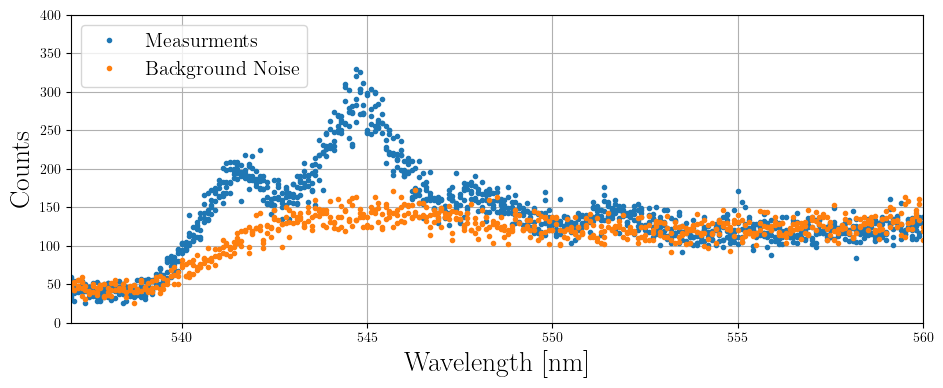

In [111]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(D2_data["wavelength"], D2_data["counts"],label="Measurments", 
             linestyle='None', fmt='.')
plt.errorbar(D2_Underground_data["wavelength"], D2_Underground_data["counts"],
             label="Background Noise", linestyle='None', fmt='.')

plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.xlabel("Wavelength [nm]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)

plt.ylim(0,400)
plt.xlim(537,560)
plt.show()

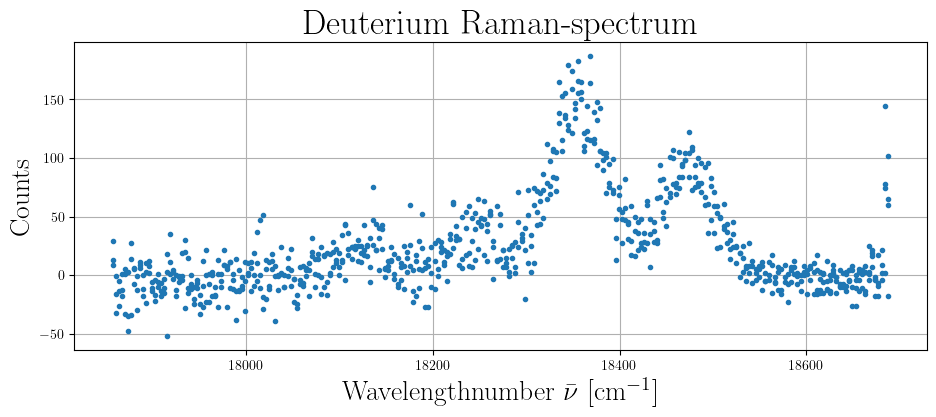

In [155]:
fig = plt.figure(figsize=(11,4))
plt.errorbar(1/D2_data["wavelength"]*10**7, D2_data["counts"]- D2_Underground_data["counts"], 
             linestyle='None', fmt='.')

#plt.legend(fontsize='x-large', loc='best')
plt.grid()
plt.title("Deuterium Raman-spectrum", fontsize=25)
plt.xlabel(r"Wavelengthnumber $\bar{\nu}$ [cm$^{-1}$]", fontsize=20)
plt.ylabel("Counts ", fontsize=20)

#plt.ylim(-0.10,200)
#plt.xlim(537,560)
plt.show()